In [1]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:98% ! important; }<style>"))

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Datasets

In [3]:
data = pd.read_csv(r"D:\AnalytixLabs\5. Machine Learning\Assignments\13. Electricity Demand Estimation\Electricity Consumption.csv", parse_dates=[0])
data.head()

,DATE,Electricty_Consumption_in_TW
0,1973-01-01,35.9728
1,1973-02-01,36.1334
2,1973-03-01,35.0625
3,1973-04-01,33.8416
4,1973-05-01,33.5107


In [4]:
data.columns = ['Date', 'Consumption']

In [5]:
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data.head()

,Date,Consumption,Year,Month
0,1973-01-01,35.9728,1973,1
1,1973-02-01,36.1334,1973,2
2,1973-03-01,35.0625,1973,3
3,1973-04-01,33.8416,1973,4
4,1973-05-01,33.5107,1973,5


In [6]:
data.set_index('Date', inplace=True)
data.head()

,Consumption,Year,Month
Date,,,
1973-01-01,35.9728,1973,1
1973-02-01,36.1334,1973,2
1973-03-01,35.0625,1973,3
1973-04-01,33.8416,1973,4
1973-05-01,33.5107,1973,5


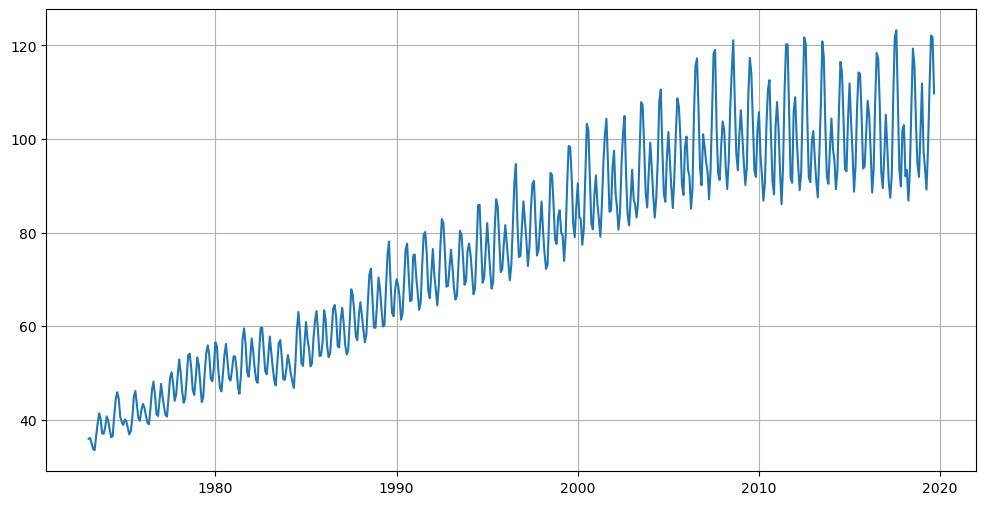

In [7]:
plt.figure(figsize=(12,6))
plt.plot(data.Consumption)
plt.grid()

In [8]:
data.isna().sum()

Consumption    0
Year           0
Month          0
dtype: int64

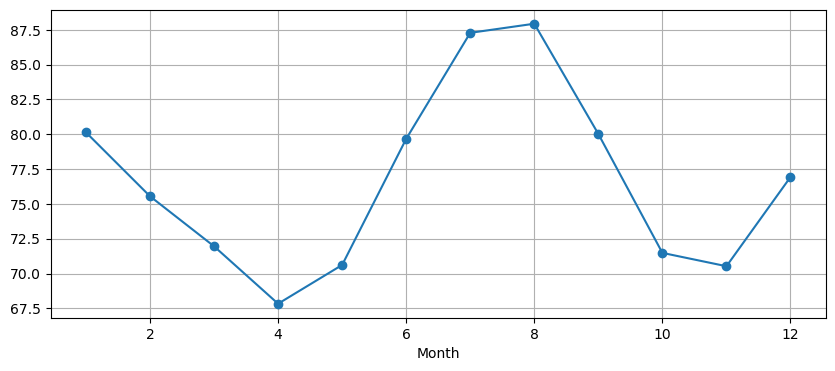

In [9]:
plt.figure(figsize=(10,4))
data.groupby(data.Month)['Consumption'].mean().plot(marker='o')
plt.grid()

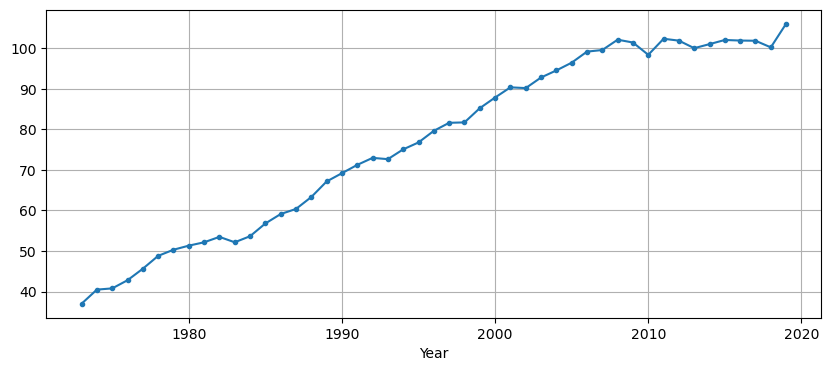

In [10]:
plt.figure(figsize=(10,4))
data.groupby(data.Year)['Consumption'].mean().plot(marker='.')
plt.grid()

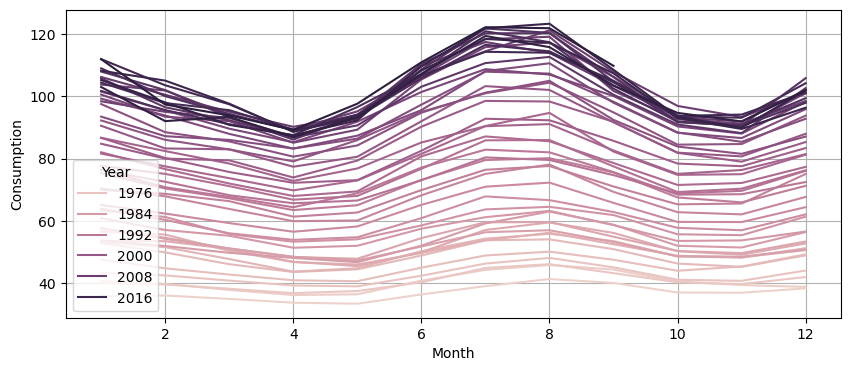

In [11]:
plt.figure(figsize=(10,4))
sns.lineplot(x=data.Month, y=data.Consumption, hue=data.Year)
plt.grid()
plt.show()

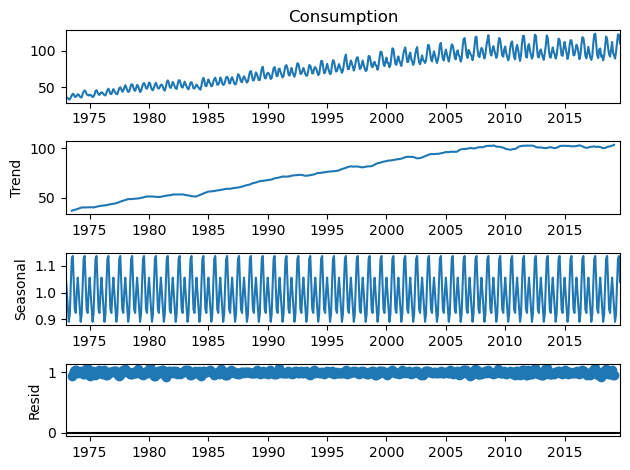

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data.Consumption, model='multiplicative')

result.plot()
plt.show()

# Check for Stationarity and Stationarizing

**'Ho'** - Time-Series data is Non-Stationary

**'Ha'** - Time-Series data is Stationary

**Significance Level** - 5%

In [13]:
from statsmodels.tsa.stattools import adfuller

adfuller(data.Consumption)

(-1.7405933729832501,
 0.410328160446865,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [14]:
def get_adfuller(ts):
    result = pd.Series(adfuller(ts)[0:4], index=['Test-Statistic','p-Value','Lags_Used','Samples'])
    return result

def check_stationarity(ts):
    adf_result = get_adfuller(ts)
    
    if adf_result['p-Value'] > 0.05:
        return f'Since p-Value: {adf_result["p-Value"]:.4f} > 0.05, data is Non-Stationary'
    else:
        return f'Since p-Value: {adf_result["p-Value"]:.4f} < 0.05, data is Stationary'

In [15]:
print(get_adfuller(data.Consumption))
check_stationarity(data.Consumption)

Test-Statistic     -1.740593
p-Value             0.410328
Lags_Used          15.000000
Samples           545.000000
dtype: float64


'Since p-Value: 0.4103 > 0.05, data is Non-Stationary'

In [16]:
print(get_adfuller(data['Consumption'].diff().dropna()))
check_stationarity(data.Consumption.diff().dropna())

Test-Statistic   -7.941665e+00
p-Value           3.301344e-12
Lags_Used         1.400000e+01
Samples           5.450000e+02
dtype: float64


'Since p-Value: 0.0000 < 0.05, data is Stationary'

<Axes: xlabel='Date'>

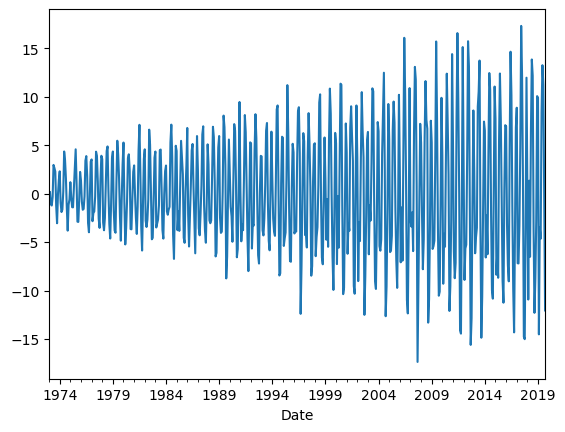

In [17]:
data['Consumption'].diff().plot()

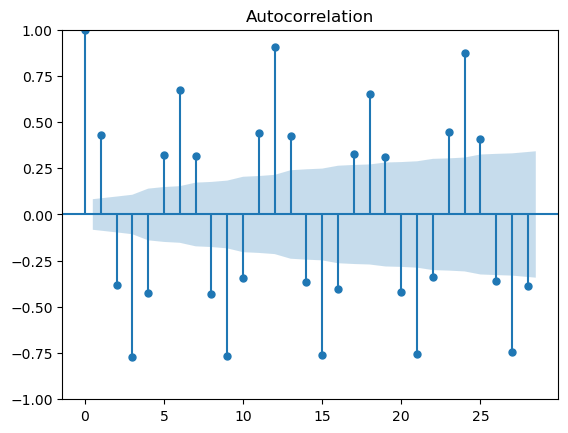

C:\Users\singh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


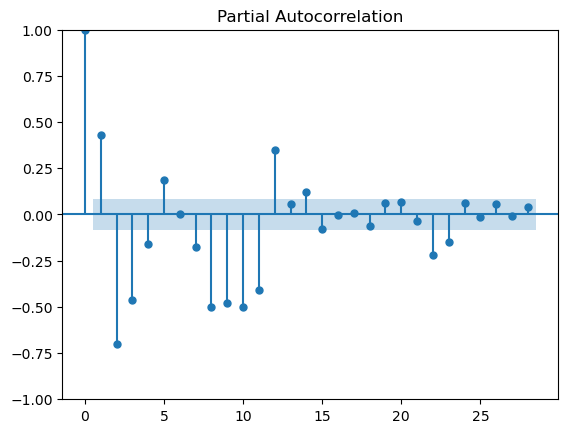

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data.Consumption.diff().dropna())
plt.show()
plot_pacf(data.Consumption.diff().dropna())
plt.show()

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [20]:
train, test = data.Consumption[:448], data.Consumption[448:]

model = ARIMA(endog=data.Consumption, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps = len(test))
#arima_pred = model_fit.predict(steps = len(test))
forecast

C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-10-01    103.008353
2019-11-01    101.996166
2019-12-01    101.843494
2020-01-01    101.820466
2020-02-01    101.816993
                 ...    
2028-10-01    101.816376
2028-11-01    101.816376
2028-12-01    101.816376
2029-01-01    101.816376
2029-02-01    101.816376
Freq: MS, Name: predicted_mean, Length: 113, dtype: float64

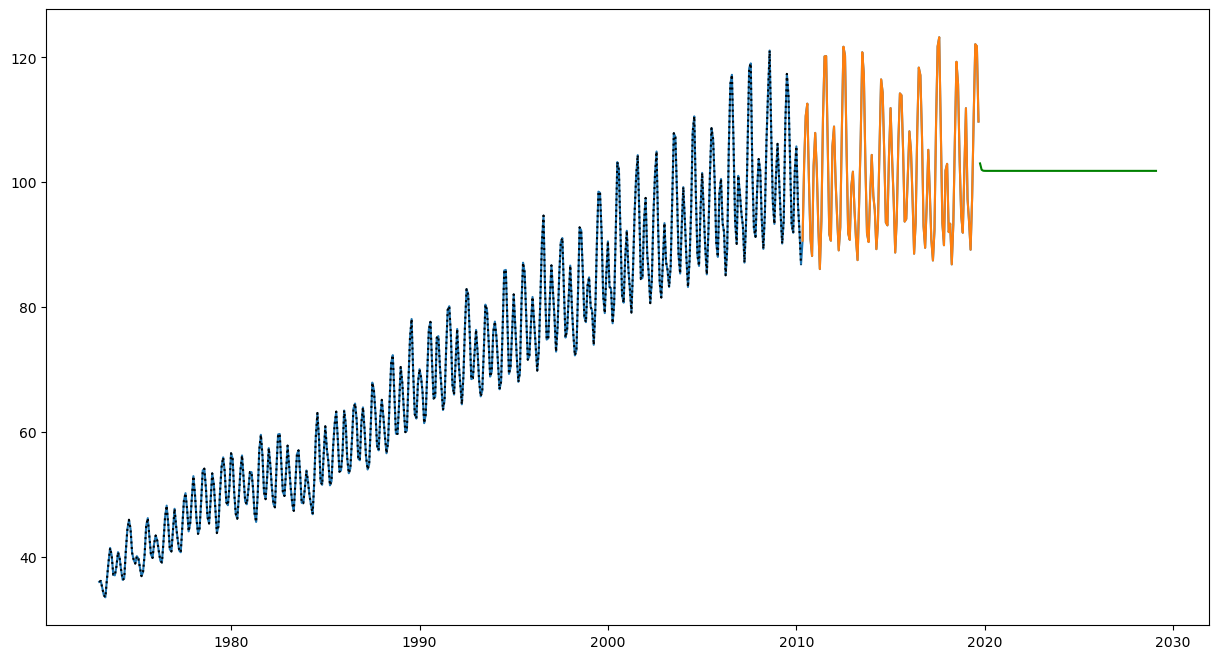

In [21]:
plt.figure(figsize=(15,8))
plt.plot(data.Consumption)
plt.plot(train, ls = ':', c='k')
plt.plot(test)
plt.plot(forecast, c='g')

In [22]:
order_list = []
mae_list = []
mape_list = []
for p in range(1,4):
    for d in range(1,4):
        for q in range(1,4):
            order = (p,d,q)
            model = ARIMA(endog=data.Consumption, order=order)
            model_fit = model.fit()
            forecast = model_fit.forecast(steps= test.shape[0])
            
            mae = mean_absolute_error(forecast,test)
            mape = mean_absolute_percentage_error(forecast,test)
            order_list.append(order)
            mae_list.append(mae)
            mape_list.append(mape)

C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

C:\Users\singh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [173]:
df = pd.DataFrame({'order':order_list, 'mae':mae_list, 'mape':mape_list})
df.mape = df.mape*100
df.sort_values(by=['mae','mape'])

,order,mae,mape
0,"(1, 1, 1)",8.642687,8.487220
2,"(1, 1, 3)",8.791279,8.519422
1,"(1, 1, 2)",8.854417,8.540983
5,"(1, 2, 3)",9.260556,8.840992
9,"(2, 1, 1)",9.405160,9.015994
13,"(2, 2, 2)",9.532591,9.128239
3,"(1, 2, 1)",10.013830,9.331694
4,"(1, 2, 2)",10.731872,9.853919
18,"(3, 1, 1)",11.098632,10.118458
20,"(3, 1, 3)",11.583863,10.253890


In [24]:
order = (1,1,1)
seasonal_order = (1,1,1,12)

model = SARIMAX(train, order = order, seasonal_order=seasonal_order)
model_fit = model.fit()
preds = model_fit.forecast(steps = len(test))

mean_absolute_error(preds,test), train.mean()

(4.067518584824886, 70.38349709821429)

In [31]:
import warnings

warnings.filterwarnings('ignore')

In [32]:
## THIS CODE WILL TAKE A LOT OF TIME. THE INTENDED OUTCOME IS PRESENTED IN NEXT CELL

order_list = []
season_list = []
mae_list = []
mape_list = []
for p in range(1,4):
    for d in range(1,4):
        for q in range(1,4):
            for P in range(1,4):
                for D in range(1,4):
                    for Q in range(1,4):
                        order = (p,d,q)
                        seasonal_order = (P,D,Q,12)
                        model = SARIMAX(train, order = order, seasonal_order=seasonal_order)
                        model_fit = model.fit()
                        forecast = model_fit.forecast(steps = len(test))

                        mae = mean_absolute_error(forecast,test)
                        mape = mean_absolute_percentage_error(forecast,test)
                        order_list.append(order)
                        season_list.append(seasonal_order)
                        mae_list.append(mae)
                        mape_list.append(mape)

LinAlgError: LU decomposition error.

In [36]:
df = pd.DataFrame({'order':order_list, 'season':season_list,'mae':mae_list, 'mape':mape_list})
df.mape = df.mape*100
df.sort_values(by=['mae','mape']).head(1)

,order,season,mae,mape
94,"(1, 2, 1)","(2, 2, 2, 12)",2.22946,2.157852


In [29]:
order = (1,2,1)
seasonal_order = (2,2,2,12)

model = SARIMAX(train, order = order, seasonal_order=seasonal_order)
model_fit = model.fit()
preds = model_fit.forecast(steps = len(test))

mean_absolute_error(preds,test), train.mean()

C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\singh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2.229459873330617, 70.38349709821429)

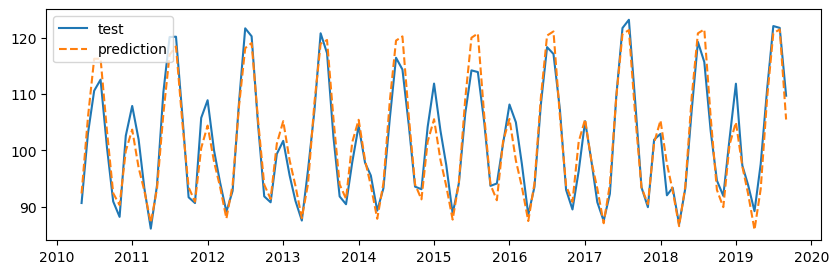

In [38]:
plt.figure(figsize=(10,3))
plt.plot(test, label = 'test')
plt.plot(preds, label = 'prediction', ls='--')
#plt.plot(arima_pred, label='arima_pred')
plt.legend()
plt.show()

<Axes: >

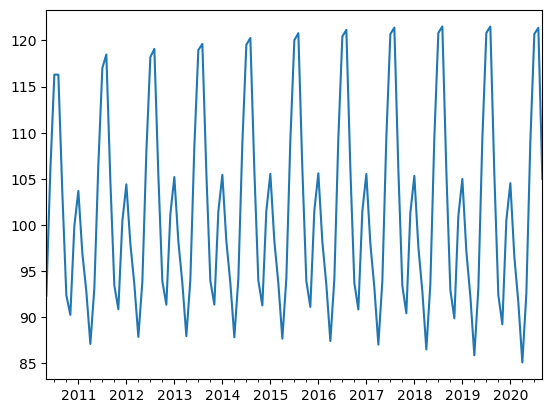

In [40]:
model_fit.forecast(steps=len(test) + 12).plot()

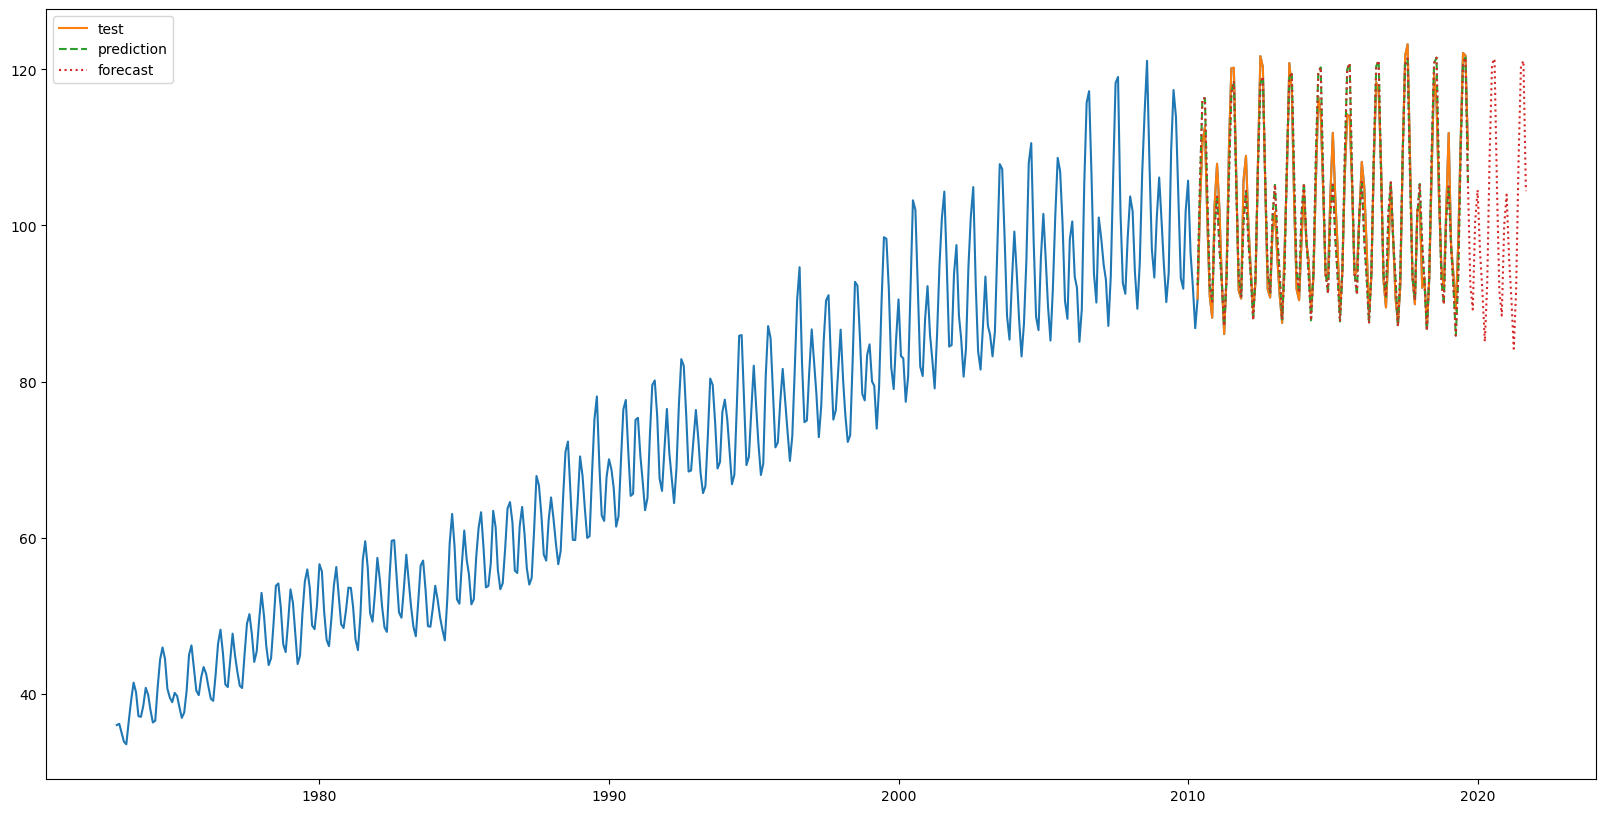

In [49]:
plt.figure(figsize=(20,10))
plt.plot(data.Consumption)
plt.plot(test, label = 'test')
plt.plot(preds, label = 'prediction', ls='--')
plt.plot(model_fit.forecast(steps=len(test) + 24), label='forecast', ls=':')
#plt.plot(arima_pred, label='arima_pred')
plt.legend()
plt.show()

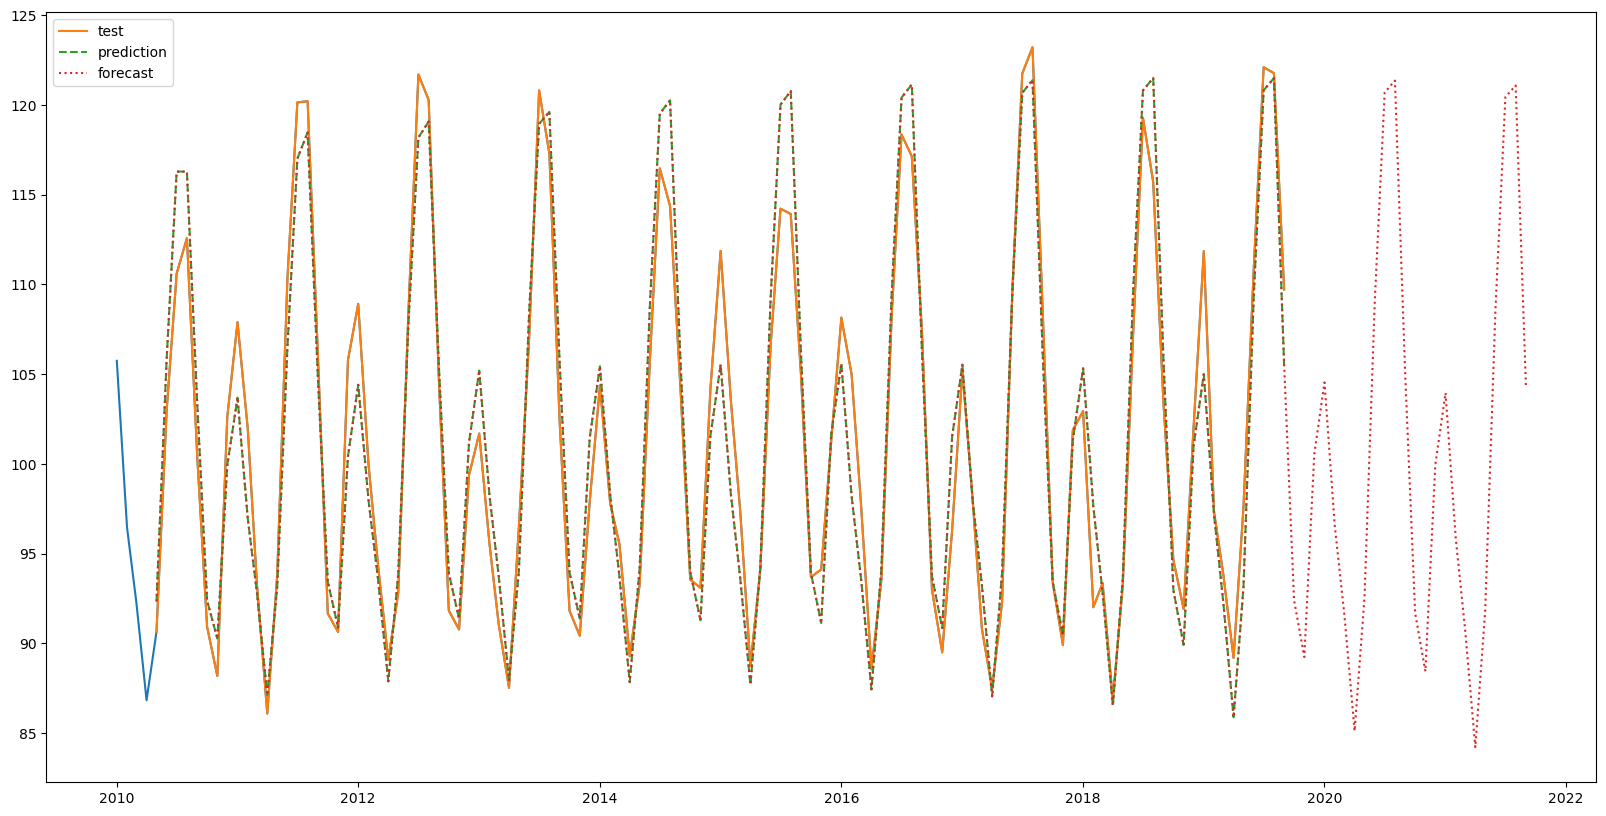

In [51]:
plt.figure(figsize=(20,10))
plt.plot(data.Consumption.loc['2010-01-01':])
plt.plot(test, label = 'test')
plt.plot(preds, label = 'prediction', ls='--')
plt.plot(model_fit.forecast(steps=len(test) + 24), label='forecast', ls=':')
#plt.plot(arima_pred, label='arima_pred')
plt.legend()
plt.show()